In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

# KNN classification of penguins.  Hey, you look kind of like that one, and 
# they're a Gentoo, so...

# This is an exploration of the Palmer Station penguins dataset 
# https://allisonhorst.github.io/palmerpenguins/
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.
# https://en.wikipedia.org/wiki/Pygoscelis

# Three hundred brush-tailed penguins were briefly captured
# and subjected to humiliating beak, flipper, and weight measurements 
# so that data science students don't have to look at Ronald Fisher's 
# iris dataset.

In [2]:
# There is a mirror of this dataset in vega-datasets.
# see if I'm allowed to download it by curl...
# curl https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json
# !curl -OL https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json 

In [3]:
# Check that the download was data and not a webpage with an error...
# !head penguins.json

In [4]:
penguins = pd.read_json("../data/penguins.json")

In [5]:
# Read in the two sets once they are fixed an in a file:
penguins_train=pd.read_csv( "penguins_train.csv")
penguins_test = pd.read_csv( "penguins_test.csv")
penguins = penguins_train


In [6]:
# How many penguins?
penguins.Species.value_counts(), len(penguins)

(Adelie       120
 Gentoo        93
 Chinstrap     44
 Name: Species, dtype: int64,
 257)

In [7]:
# Dictionary for painting the dots high-contrast colors
colors = { "Adelie" : "green", "Gentoo": "blue", "Chinstrap": "red"}

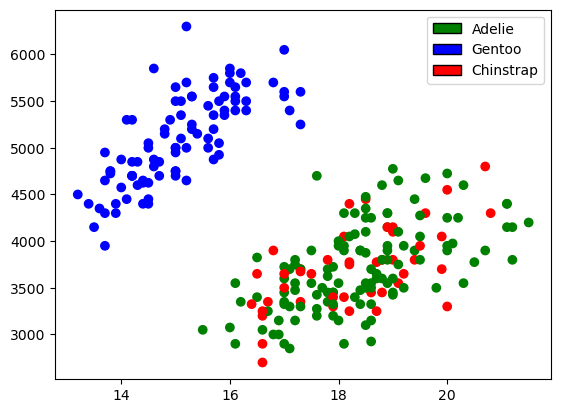

In [8]:
plt.scatter(penguins["Beak Depth (mm)"], penguins["Body Mass (g)"] , color = penguins.Species.map(colors)  )
# Had to look up how to make a legend for this kind of data
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c[1], edgecolor='k', label=c[0]) for c in colors.items()]
plt.legend(handles=legend_elements)

<AxesSubplot: xlabel='Beak Depth (mm)', ylabel='Body Mass (g)'>

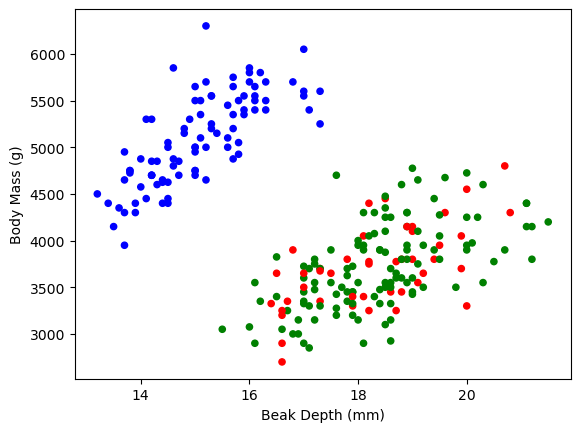

In [9]:
penguins.plot( "Beak Depth (mm)", "Body Mass (g)" , kind="scatter", color = penguins.Species.map(colors)  )

In [10]:
# Since I have to clean.. and I have to clean training and test,
# put all the essential cleaning in a funciton and call it three times.

def penguincleanit(data):
    data["SP1"] = data.Species == "Adelie"
    data["SP2"] = data.Species == "Gentoo"
    data["SP3"] = data.Species == "Chinstrap"
    # construct a class label... Adelie, Gentoo, Chinstrap. 
    # Alphabetical order would probably be a better choice.  WHY? 
    data["LABEL"] = data["SP2"] + 2 * data["SP3"]  
    # I don't know how I'm going to keep Depth / mass / flipper /length straight.
    return data[np.isfinite( data["Beak Depth (mm)"]) & 
                        np.isfinite( data["Body Mass (g)"]) &
                        np.isfinite( data["Flipper Length (mm)"]) & 
                        np.isfinite( data["Beak Length (mm)"])] 
                   
penguinclean = penguincleanit(penguins)
penguins_test = penguincleanit(penguins_test)
penguins_train = penguincleanit(penguins_train)

In [11]:
penguinclean.LABEL.value_counts()


0    119
1     92
2     44
Name: LABEL, dtype: int64

In [12]:
penguins["SP1"].sum(), penguins["SP2"].sum(), penguins["SP3"].sum()

(120, 93, 44)

In [13]:
len(penguins)

257

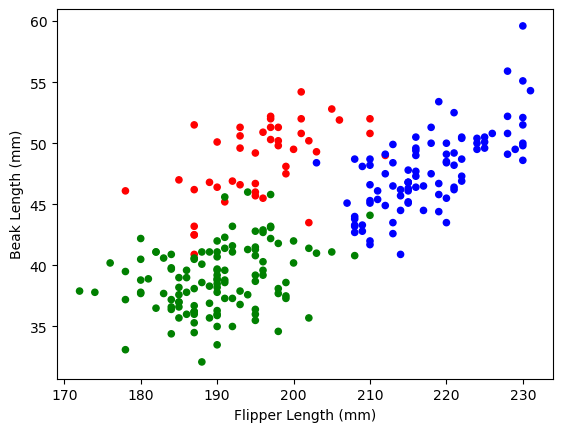

In [14]:
penguins[["Flipper Length (mm)", "Beak Length (mm)"]].plot("Flipper Length (mm)", "Beak Length (mm)", kind="scatter", color = penguins.Species.map(colors))
plt.savefig("PENGUIN.png", dpi=300, bbox_inches="tight")

In [15]:
from sklearn.cluster import KMeans


In [16]:
labels= penguins_train.LABEL
X = penguins_train[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values
XTEST = penguins_test[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values
YTEST = penguins_test["LABEL"]

In [17]:
np.isnan(X).sum()

0

In [18]:
X.shape, labels.shape, type(X), type(labels)

((255, 4), (255,), numpy.ndarray, pandas.core.series.Series)

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [22]:
labels= penguins_train.LABEL
X = penguins_train[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values
XTEST = penguins_test[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values
YTEST = penguins_test["LABEL"]

In [23]:
fit = KMeans().fit(X)  # default n=8

/Users/wltrimbl/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
fit.labels_

array([0, 5, 2, 6, 1, 5, 6, 3, 7, 6, 6, 5, 5, 5, 5, 6, 4, 0, 4, 4, 2, 3,
       2, 4, 5, 2, 2, 7, 0, 4, 0, 6, 3, 6, 3, 2, 5, 6, 2, 1, 7, 7, 2, 7,
       5, 4, 2, 0, 3, 4, 4, 3, 1, 3, 7, 6, 1, 3, 6, 5, 1, 5, 7, 3, 1, 1,
       5, 2, 0, 0, 4, 7, 2, 6, 1, 1, 4, 0, 6, 2, 1, 3, 7, 6, 5, 2, 6, 0,
       2, 6, 3, 1, 7, 4, 1, 6, 3, 0, 0, 7, 5, 5, 1, 4, 3, 0, 2, 3, 6, 6,
       0, 6, 7, 2, 7, 1, 7, 4, 3, 5, 6, 3, 6, 7, 3, 7, 3, 0, 5, 2, 7, 0,
       3, 2, 3, 3, 6, 7, 1, 0, 1, 0, 3, 5, 2, 0, 6, 7, 0, 0, 6, 5, 7, 0,
       3, 1, 2, 2, 6, 7, 5, 7, 2, 6, 0, 5, 6, 3, 4, 2, 7, 2, 7, 2, 0, 3,
       0, 5, 1, 3, 1, 6, 5, 0, 3, 0, 7, 2, 0, 3, 2, 2, 4, 2, 2, 2, 0, 7,
       0, 7, 6, 5, 7, 1, 2, 7, 3, 1, 1, 3, 5, 0, 6, 3, 3, 1, 1, 2, 3, 3,
       6, 7, 5, 2, 5, 7, 1, 0, 7, 0, 3, 0, 6, 0, 3, 7, 2, 3, 4, 6, 7, 0,
       6, 7, 0, 2, 6, 6, 4, 1, 0, 6, 7, 3, 7], dtype=int32)

In [27]:
fit.predict(XTEST)

array([3, 6, 2, 7, 6, 4, 4, 0, 0, 0, 7, 3, 1, 3, 6, 5, 1, 2, 6, 6, 2, 7,
       7, 7, 7, 0, 6, 2, 7, 1, 3, 7, 5, 5, 0, 6, 2, 0, 3, 0, 6, 2, 6, 7,
       0, 5, 7, 1, 1, 7, 6, 0, 2, 3, 7, 3, 0, 6, 1, 3, 0, 0, 5, 4, 2, 1,
       3, 0, 0, 6, 0, 1, 7, 5, 7, 6, 7, 2, 3, 0, 0, 3, 2, 3, 5, 2, 4],
      dtype=int32)

In [30]:
XTEST.shape, X.shape

((87, 4), (255, 4))

<AxesSubplot: xlabel='Flipper Length (mm)', ylabel='Beak Length (mm)'>

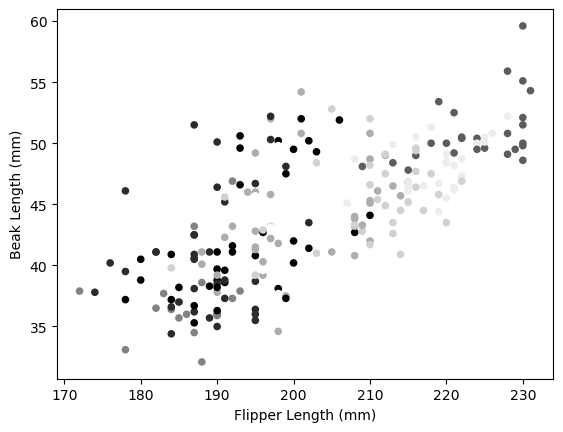

In [34]:
penguins.dropna()[["Flipper Length (mm)", "Beak Length (mm)"]].plot("Flipper Length (mm)", 
                                                           "Beak Length (mm)", 
                                                           kind="scatter", 
                                                           color = fit.predict(penguins.dropna()[["Beak Depth (mm)", 
                                                                                                  "Body Mass (g)", 
                                                                                                  "Beak Length (mm)", 
                                                                                                  "Flipper Length (mm)"]].values), 
                                                                   )
#plt.savefig("PENGUIN.png", dpi=300, bbox_inches="tight")

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_56139/1535857408.py:2: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  penguins.dropna()[["Flipper Length (mm)", "Beak Length (mm)"]].plot("Flipper Length (mm)",


<AxesSubplot: xlabel='Flipper Length (mm)', ylabel='Beak Length (mm)'>

<Figure size 400x400 with 0 Axes>

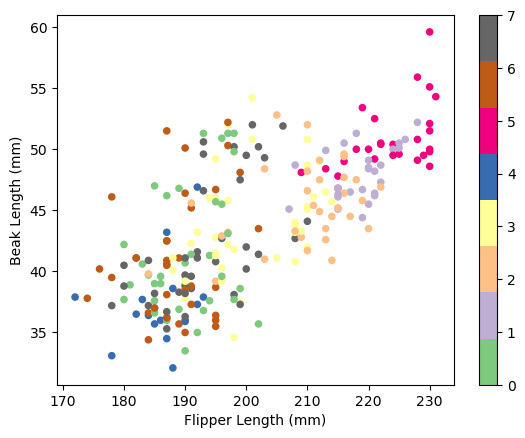

In [37]:
plt.figure(figsize=(4,4))
penguins.dropna()[["Flipper Length (mm)", "Beak Length (mm)"]].plot("Flipper Length (mm)", 
                                                           "Beak Length (mm)", 
                                                           kind="scatter", 
                                                           color = fit.predict(penguins.dropna()[["Beak Depth (mm)", 
                                                                                                  "Body Mass (g)", 
                                                                                                  "Beak Length (mm)", 
                                                                                                  "Flipper Length (mm)"]].values), 
                                                                  cmap="Accent" )
#plt.savefig("PENGUIN.png", dpi=300, bbox_inches="tight")

In [39]:
fit2 = KMeans(n_clusters=2).fit(X)  # default n=8

/Users/wltrimbl/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_56139/2404039726.py:2: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  penguins.dropna()[["Flipper Length (mm)",


<AxesSubplot: xlabel='Flipper Length (mm)', ylabel='Beak Length (mm)'>

<Figure size 400x400 with 0 Axes>

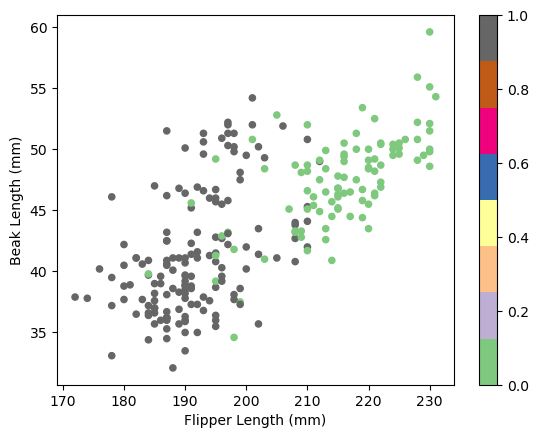

In [40]:
plt.figure(figsize=(4,4))
penguins.dropna()[["Flipper Length (mm)", 
                   "Beak Length (mm)"]].plot(
    "Flipper Length (mm)", 
    "Beak Length (mm)", 
    kind="scatter", 
        color = fit2.predict(penguins.dropna()[["Beak Depth (mm)", 
 "Body Mass (g)", 
   "Beak Length (mm)", 
    "Flipper Length (mm)"]].values), 
  cmap="Accent" )
#plt.savefig("PENGUIN.png", dpi=300, bbox_inches="tight")

In [42]:
X.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [47]:
X.mean(axis=0), X.std(axis=0
                      )

(array([  17.1745098 , 4216.07843137,   43.75254902,  200.92156863]),
 array([  1.94507353, 805.94379805,   5.4500066 ,  14.4372111 ]))

In [48]:
penguins.head()

,Unnamed: 0,Species,Island,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex,SP1,SP2,SP3,LABEL
0,194,Chinstrap,Dream,50.9,19.1,196.0,3550.0,MALE,False,False,True,2
1,295,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,MALE,False,True,False,1
2,263,Gentoo,Biscoe,49.6,15.0,216.0,4750.0,MALE,False,True,False,1
3,158,Chinstrap,Dream,46.1,18.2,178.0,3250.0,FEMALE,False,False,True,2
4,292,Gentoo,Biscoe,48.2,15.6,221.0,5100.0,MALE,False,True,False,1


(array([[ 9., 21., 37., 27., 18.,  7.,  0.,  0.,  0.,  0.],
        [ 9., 21., 37., 28., 28., 29., 20., 23., 14.,  2.],
        [11., 32., 51., 37., 34., 31., 20., 23., 14.,  2.]]),
 array([2700., 3060., 3420., 3780., 4140., 4500., 4860., 5220., 5580.,
        5940., 6300.]),
 <a list of 3 BarContainer objects>)

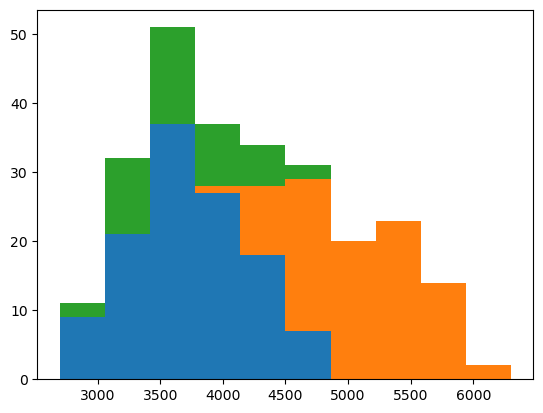

In [52]:
field = "Body Mass (g)"
penguinslist = [ penguins.query("SP1==True")[field], 
                  penguins.query("SP2==True")[field],
               penguins.query("SP3==True")[field]] 
plt.hist(penguinslist , stacked=True)

In [53]:
# https://stackoverflow.com/questions/18449602/create-stacked-histogram-from-unequal-length-arrays
# To get stacked (or side-by-side) histogram bars, use a list of objects containing
# the variable of interest.

In [55]:
twoclass= fit2.predict(penguins.dropna()[["Beak Depth (mm)", 
 "Body Mass (g)", 
   "Beak Length (mm)", 
    "Flipper Length (mm)"]].values)
                       

In [56]:
twoclass

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1], dtype=int32)

In [59]:
listoftwoclassesmasses = [penguins.loc[np.where(twoclass==0)]["Body Mass (g)"] ,
                    penguins.loc[np.where(twoclass==1)]["Body Mass (g)"] ]

(array([[ 2., 11., 21., 13., 12., 13.,  9., 11.,  7.,  1.],
        [10., 31., 50., 35., 33., 31., 20., 22., 14.,  2.]]),
 array([2700., 3060., 3420., 3780., 4140., 4500., 4860., 5220., 5580.,
        5940., 6300.]),
 <a list of 2 BarContainer objects>)

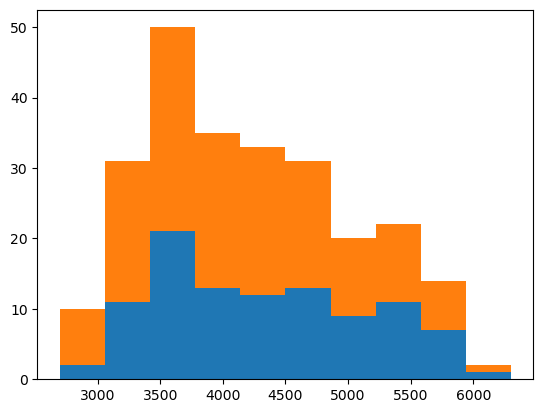

In [60]:
plt.hist(listoftwoclassesmasses, stacked=True)

(array([[ 2.,  3., 13., 24., 11.,  6., 10., 14.,  9.,  8.],
        [ 2., 15., 42., 52., 33., 10., 30., 28., 22., 14.]]),
 array([172. , 177.9, 183.8, 189.7, 195.6, 201.5, 207.4, 213.3, 219.2,
        225.1, 231. ]),
 <a list of 2 BarContainer objects>)

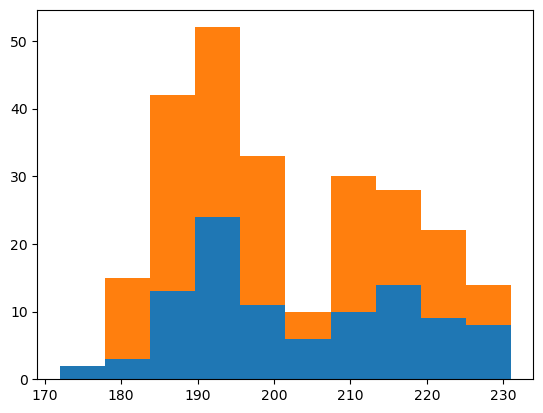

In [61]:
field = "Flipper Length (mm)"
listoftwoclassesfields = [penguins.loc[np.where(twoclass==0)][field] ,
                    penguins.loc[np.where(twoclass==1)][field] ]
plt.hist(listoftwoclassesfields, stacked=True)

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_56139/2355785362.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  penguins.dropna()[["Beak Depth (mm)",


<AxesSubplot: xlabel='Beak Depth (mm)', ylabel='Beak Length (mm)'>

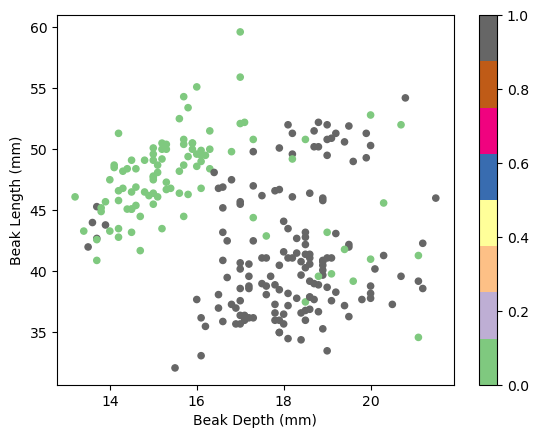

In [67]:
penguins.dropna()[["Beak Depth (mm)", 
                   "Beak Length (mm)"]].plot(
    "Beak Depth (mm)", 
    "Beak Length (mm)", 
    kind="scatter", 
        color = twoclass, 
  cmap="Accent" )

In [73]:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit(X).transform(X)
X.std(axis=0), XS.std(axis=0)

(array([  1.94507353, 805.94379805,   5.4500066 ,  14.4372111 ]),
 array([1., 1., 1., 1.]))

In [69]:
fit2S = KMeans(n_clusters=2).fit(XS)  # default n=8

/Users/wltrimbl/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


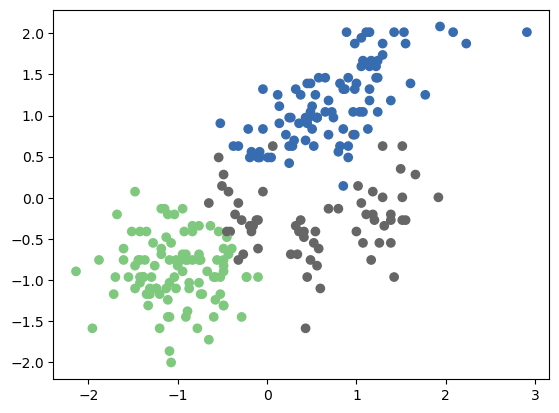

In [83]:
plt.scatter(
    XS[:,2],
    XS[:,3],
   
        c = fit3.predict(XS),
  cmap="Accent" )

In [74]:
fit3 = KMeans(n_clusters=3).fit(XS)  # default n=8

/Users/wltrimbl/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_56139/1713378201.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  penguins.dropna()[["Beak Depth (mm)",


<AxesSubplot: xlabel='Beak Depth (mm)', ylabel='Beak Length (mm)'>

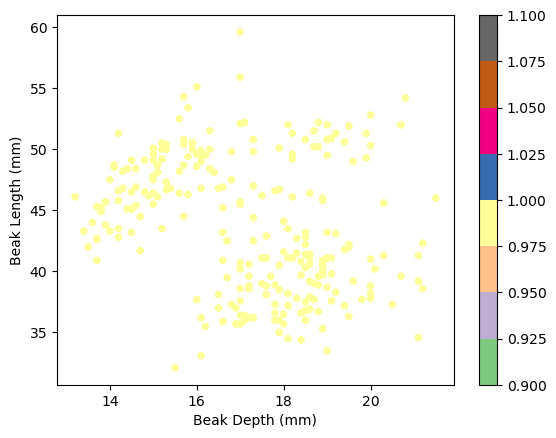

In [75]:
penguins.dropna()[["Beak Depth (mm)", 
                   "Beak Length (mm)"]].plot(
    "Beak Depth (mm)", 
    "Beak Length (mm)", 
    kind="scatter", 
        color = fit3.predict(penguins.dropna()[["Beak Depth (mm)", 
 "Body Mass (g)", 
   "Beak Length (mm)", 
    "Flipper Length (mm)"]].values),
  cmap="Accent" )